In [1]:
# importing libraries
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
# importing data
amazon = pd.read_csv("Amazon.com Inc.csv", index_col=0)
credit_suisse = pd.read_csv("Credit Suisse Group.csv", index_col=0)
nextera = pd.read_csv("Nextera Energy Inc.csv", index_col=0)
sp500 = pd.read_csv("S_P 500.csv", index_col=0)
tesla = pd.read_csv("Tesla Inc.csv", index_col=0)

In [3]:
# making sp&500 into numerical 
sp500["Price"] = sp500["Price"].str.replace(",", "")
sp500["Price"] = sp500["Price"].astype(float)

In [4]:
# putting all together
data = pd.DataFrame(index = amazon.index)
data["Amazon"] = amazon
data["Credit Suisse Group"] = credit_suisse
data["Nextera"] = nextera
data["SP 500"] = sp500
data["Tesla"] = tesla
data.index = pd.to_datetime(data.index)
print(data.head())
print(data.tail())

            Amazon  Credit Suisse Group  Nextera   SP 500   Tesla
Date                                                             
2023-03-31  103.29                 0.89    77.08  4109.31  207.46
2023-03-30  102.00                 0.87    76.59  4050.83  195.28
2023-03-29  100.25                 0.88    76.11  4027.81  193.88
2023-03-28   97.24                 0.85    75.24  3971.27  189.19
2023-03-27   98.04                 0.86    75.44  3977.53  191.81
            Amazon  Credit Suisse Group  Nextera   SP 500  Tesla
Date                                                            
2013-01-08   13.32                24.30    17.82  1457.15   2.25
2013-01-07   13.42                24.34    17.64  1461.89   2.29
2013-01-04   12.96                23.75    17.72  1466.47   2.29
2013-01-03   12.92                23.17    17.63  1459.37   2.32
2013-01-02   12.87                23.28    17.63  1462.42   2.36


In [5]:
# Analysing if data is good
data.isnull().sum()
# Data is amazing

Amazon                 0
Credit Suisse Group    0
Nextera                0
SP 500                 0
Tesla                  0
dtype: int64

**Looking at the relation between data. However, this is the relation between prices, not returns, and it obviously violates any principle of statistical inference**

I'm trying to understand why S&P isn't here. Also interesting that there's very stron relation between Nextera and Amazon for some reason (which dillutes, however, as price go up)

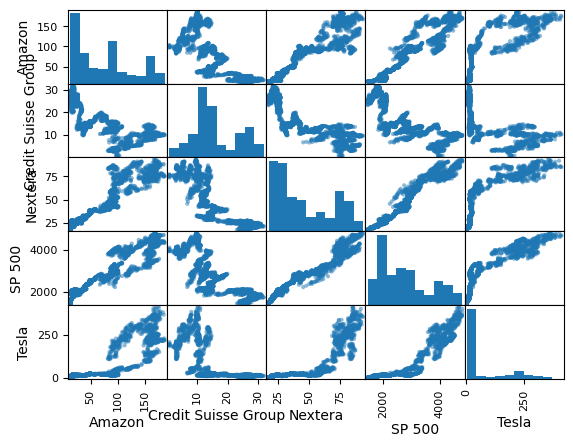

In [ ]:
sm = scatter_matrix(data)

Coming now to returns

In [ ]:
# I assumed return = (Price _ t - Price _ t-1) / Price _ t-1
# since the data is in descending order, I shift up
returns = pd.DataFrame(index = data.index)
log_returns = pd.DataFrame(index = data.index)
for i in data.columns:
    returns[i] = (data[i] - data[i].shift(-1)) / data[i].shift(-1)
    log_returns[i] = np.log(data[i]) - np.log(data[i].shift(-1))
#remove last row
returns = returns.dropna()
log_returns  = log_returns.dropna()

In [ ]:
# Analysing returns
print(returns)
print(log_returns)

              Amazon  Credit Suisse Group   Nextera    SP 500     Tesla
Date                                                                   
2023-03-31  0.012647             0.022989  0.006398  0.014437  0.062372
2023-03-30  0.017456            -0.011364  0.006307  0.005715  0.007221
2023-03-29  0.030954             0.035294  0.011563  0.014237  0.024790
2023-03-28 -0.008160            -0.011628 -0.002651 -0.001574 -0.013659
2023-03-27 -0.000917             0.000000 -0.003303  0.001647  0.007353
...              ...                  ...       ...       ...       ...
2013-01-09  0.000000             0.015226 -0.006734  0.002656 -0.004444
2013-01-08 -0.007452            -0.001643  0.010204 -0.003242 -0.017467
2013-01-07  0.035494             0.024842 -0.004515 -0.003123  0.000000
2013-01-04  0.003096             0.025032  0.005105  0.004865 -0.012931
2013-01-03  0.003885            -0.004725  0.000000 -0.002086 -0.016949

[2579 rows x 5 columns]
              Amazon  Credit Suisse Gro

Scatter matrices

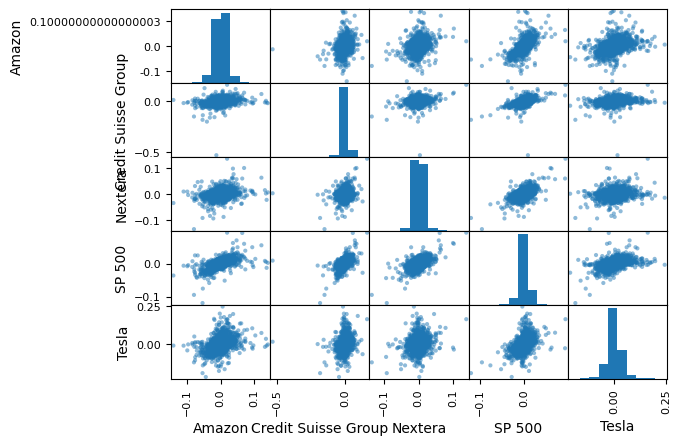

In [9]:
sm_ret = scatter_matrix(returns)

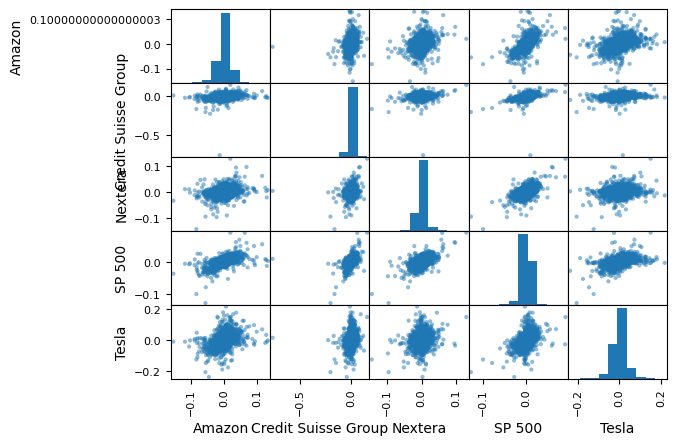

In [10]:
sm_log_ret = scatter_matrix(log_returns)

Now will analyse using log returns. This part will analyse if there is relation between some stock and Credit Suisse

In [11]:
formula = "Q('Credit Suisse Group') ~ Q('SP 500')+Amazon+Nextera+Tesla"
credit_suisse_lm = smf.ols(formula = formula, data = log_returns).fit()
credit_suisse_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Q('Credit Suisse Group')   R-squared:                       0.268
Model:                                  OLS   Adj. R-squared:                  0.267
Method:                       Least Squares   F-statistic:                     235.2
Date:                      Wed, 05 Apr 2023   Prob (F-statistic):          2.64e-172
Time:                              19:54:17   Log-Likelihood:                 5987.5
No. Observations:                      2579   AIC:                        -1.197e+04
Df Residuals:                          2574   BIC:                        -1.194e+04
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0017      0.000     -3.526      0.000      -0.003      -0.001
Q('SP 500')     1.5676      0.064     24.448      0.000       1.442       1.693
Amazon         -0.1251      0.029     -4.286      0.000      -0.182      -0.068
Nextera        -0.2364      0.040     -5.950      0.000      -0.314      -0.158
Tesla          -0.0025      0.015     -0.174      0.862      -0.031       0.026
==============================================================================
Omnibus:                     4913.415   Durbin-Watson:                   1.911
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         20853798.059
Skew:                         -13.940   Prob(JB):                         0.00
Kurtosis:                     442.644   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Overall, Variation in stock prices explain only 26% of Credit Suisse's variation

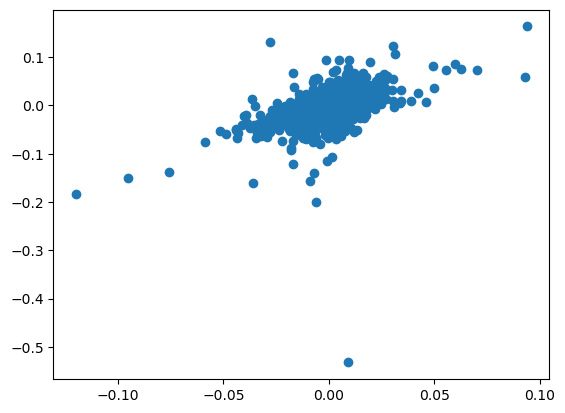

In [12]:
# Looking at CS's variation with S&P
plt.scatter(returns["SP 500"], returns["Credit Suisse Group"])

**Analysing beta of all stocks**

With log returns

In [43]:
fit_against_market = {}
for i in log_returns.columns:
    formula = "Q('{}')~Q('SP 500')".format(i)
    fit_against_market[i] = smf.ols(formula = formula, data=log_returns).fit()
    # print(fit_against_market[i].summary())

                            OLS Regression Results                            
Dep. Variable:            Q('Amazon')   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     1543.
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          7.49e-265
Time:                        20:35:23   Log-Likelihood:                 6958.1
No. Observations:                2579   AIC:                        -1.391e+04
Df Residuals:                    2577   BIC:                        -1.390e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0004      0.000      1.097      

Interesting observation: without market trends, Tesla has the highest rate of return (0,12%). It also has the highest beta

In [14]:
regressions = pd.DataFrame(index=log_returns.columns, columns=["Alpha", "Beta", "R^2"])
for i in log_returns.columns:
    regressions.loc[i] = [fit_against_market[i].params[0], fit_against_market[i].params[1], fit_against_market[i].rsquared]
regressions

,Alpha,Beta,R^2
Amazon,0.000352,1.135971,0.374471
Credit Suisse Group,-0.00177,1.258712,0.253595
Nextera,0.000296,0.690023,0.294278
SP 500,0.0,1.0,1.0
Tesla,0.001158,1.440899,0.196779


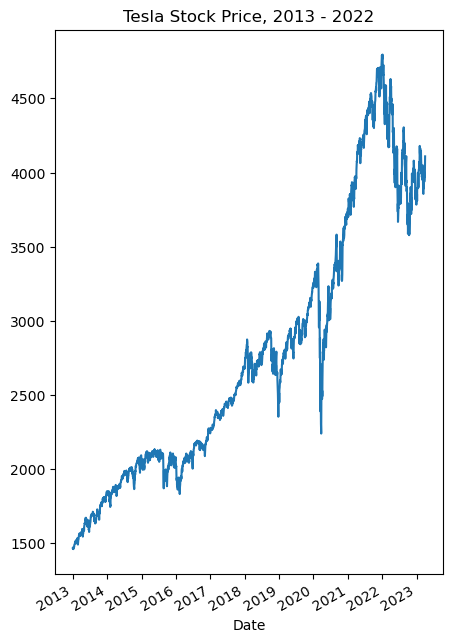

In [15]:
import matplotlib.dates as mdates

plt.figure(figsize=(5,8))
plt.title("Tesla Stock Price, 2013 - 2022")
data["Tesla"][::-1].plot()
# print(plt.gca())
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
# ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonth=1))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.savefig('./figg')
# plt.show()


Quite interesting: Tesla has the highest market-independent return, highest beta and is least explained by the market

Multivariate regression for Tesla

In [16]:
formula = "Tesla ~ Q('SP 500')+Amazon+Nextera+Q('Credit Suisse Group')"
tesla_lm = smf.ols(formula = formula, data = log_returns).fit()
tesla_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tesla   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          3.03e-135
Time:                        19:54:17   Log-Likelihood:                 5226.1
No. Observations:                2579   AIC:                        -1.044e+04
Df Residuals:                    2574   BIC:                        -1.041e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0011      0.001      1.730      0.084      -0.000       0.002
Q('SP 500')                  1.2197      0.093     13.179      0.000       1.038       1.401
Amazon                       0.2878      0.039      7.391      0.000       0.211       0.364
Nextera                     -0.1449      0.054     -2.700      0.007      -0.250      -0.040
Q('Credit Suisse Group')    -0.0046      0.026     -0.174      0.862      -0.057       0.047
==============================================================================
Omnibus:                      339.218   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3560.958
Skew:                           0.202   Prob(JB):                         0.00
Kurtosis:                       8.742   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
formula = "Tesla ~ Amazon"
tesla_lm = smf.ols(formula = formula, data = log_returns).fit()
tesla_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tesla   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     431.0
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           1.18e-88
Time:                        19:54:17   Log-Likelihood:                 5109.6
No. Observations:                2579   AIC:                        -1.022e+04
Df Residuals:                    2577   BIC:                        -1.020e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0012      0.001      1.825      0.068   -8.91e-05       0.002
Amazon         0.6624      0.032     20.761      0.000       0.600       0.725
==============================================================================
Omnibus:                      310.760   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3041.701
Skew:                           0.125   Prob(JB):                         0.00
Kurtosis:                       8.314   Cond. No.                         48.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
formula = "Tesla ~ Nextera"
tesla_lm = smf.ols(formula = formula, data = log_returns).fit()
tesla_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tesla   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     95.70
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           3.25e-22
Time:                        19:54:17   Log-Likelihood:                 4957.1
No. Observations:                2579   AIC:                            -9910.
Df Residuals:                    2577   BIC:                            -9899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0015      0.001      2.091      0.037    9.08e-05       0.003
Nextera        0.4832      0.049      9.782      0.000       0.386       0.580
==============================================================================
Omnibus:                      279.557   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2393.901
Skew:                           0.072   Prob(JB):                         0.00
Kurtosis:                       7.718   Cond. No.                         70.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
formula = "Tesla ~ Q('SP 500') + Amazon"
tesla_lm = smf.ols(formula = formula, data = log_returns).fit()
tesla_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tesla   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     353.0
Date:                Wed, 05 Apr 2023   Prob (F-statistic):          3.26e-136
Time:                        19:54:17   Log-Likelihood:                 5222.5
No. Observations:                2579   AIC:                        -1.044e+04
Df Residuals:                    2576   BIC:                        -1.042e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0011      0.001      1.672      0.095      -0.000       0.002
Q('SP 500')     1.1006      0.072     15.353      0.000       0.960       1.241
Amazon          0.2995      0.039      7.756      0.000       0.224       0.375
==============================================================================
Omnibus:                      340.851   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3639.178
Skew:                           0.196   Prob(JB):                         0.00
Kurtosis:                       8.806   Cond. No.                         121.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
# Trying different returns
print("Arithmetic average:", data["Tesla"][0] / data["Tesla"][-1] / data.shape[0])
print("Geometric average:", (data["Tesla"][0] / data["Tesla"][-1]) ** (1 / data.shape[0]) - 1)
print("Annual average:", (data["Tesla"][0] / data["Tesla"][-1]) ** (365 / data.shape[0]) - 1)


Arithmetic average: 0.03407239521744843
Geometric average: 0.001736497026321615
Annual average: 0.8837636862451745


In [41]:
# Log returns

print("Daily log return:", log_returns["Tesla"].mean())
print("Daily return from log:", e**log_returns["Tesla"].mean() - 1)

from math import e
print("Annual return:", (e**log_returns["Tesla"].mean())**365 - 1)
print("Stdev:", log_returns["Tesla"].std())

Daily log return: 0.001735663796419607
Daily return from log: 0.0017371709326612361
Annual return: 0.8842262999616084
Stdev: 0.0360577022969068


In [51]:
formula = "Tesla ~ Q('SP 500')+Amazon+Nextera+Q('Credit Suisse Group')"
tesla_lm = smf.ols(formula = formula, data = log_returns.loc[log_returns.index > '2017-01-01']).fit()
tesla_lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Tesla   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     130.7
Date:                Wed, 05 Apr 2023   Prob (F-statistic):           2.22e-96
Time:                        21:08:41   Log-Likelihood:                 3099.9
No. Observations:                1572   AIC:                            -6190.
Df Residuals:                    1567   BIC:                            -6163.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    0.0012      0.001      1.347      0.178      -0.001       0.003
Q('SP 500')                  1.1493      0.116      9.940      0.000       0.923       1.376
Amazon                       0.3298      0.054      6.156      0.000       0.225       0.435
Nextera                     -0.1052      0.066     -1.596      0.111      -0.235       0.024
Q('Credit Suisse Group')     0.0228      0.031      0.734      0.463      -0.038       0.084
==============================================================================
Omnibus:                      168.555   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1379.262
Skew:                          -0.033   Prob(JB):                    3.14e-300
Kurtosis:                       7.588   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

,Amazon,Credit Suisse Group,Nextera,SP 500,Tesla
Date,,,,,
2023-03-31,103.29,0.89,77.08,4109.31,207.46
2023-03-30,102.00,0.87,76.59,4050.83,195.28
2023-03-29,100.25,0.88,76.11,4027.81,193.88
2023-03-28,97.24,0.85,75.24,3971.27,189.19
2023-03-27,98.04,0.86,75.44,3977.53,191.81
...,...,...,...,...,...
2015-05-22,21.38,25.24,25.56,2126.06,16.52
2015-05-21,21.58,25.27,25.54,2130.82,16.37
2015-05-20,21.19,25.36,25.63,2125.85,16.29


In [61]:
fit_against_market_new = {}
for i in log_returns.columns:
    formula = "Q('{}')~Q('SP 500')".format(i)
    fit_against_market_new[i] = smf.ols(formula = formula, data=log_returns.loc[log_returns.index > '2022-01-01']).fit()
    # print(fit_against_market[i].summary())
    
regressions = pd.DataFrame(index=log_returns.columns, columns=["Alpha", "Beta", "R^2"])
for i in log_returns.columns:
    regressions.loc[i] = [fit_against_market_new[i].params[0], fit_against_market_new[i].params[1], fit_against_market_new[i].rsquared]
regressions

,Alpha,Beta,R^2
Amazon,-0.000747,1.6524,0.616883
Credit Suisse Group,-0.007008,1.275146,0.105271
Nextera,-0.000261,0.741849,0.313803
SP 500,-0.0,1.0,1.0
Tesla,-0.000832,1.814351,0.376788
